In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username
from most_forked_repos import repos

# Acquire

# Prepare

In [3]:
import pandas as pd
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split


import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import strftime
import numpy as np

import scrape_url_list as s
import acquire as a
import prepare as p

# ignore warnings
import warnings
warnings.filterwarnings("ignore")



import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import strftime
import numpy as np

import scrape_url_list as s
import acquire as a
import prepare as p
import explore as e

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import unicodedata
import re

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
# sns.set_palette('viridis')

import nltk
#nltk.download('stopwords')

In [4]:
# Skip ahead to where data was put into a cached dataframe

# Create a dataframe that gives repo name, language, and readme
df = pd.read_json('data.json')
df.head()

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
4,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...


In [5]:
df.shape

(500, 3)

In [6]:
# This pulls the row with 0 index, and the column "readme_contents"
df.loc[0 ,'readme_contents']

'How to share data with a statistician\n===========\n\nThis is a guide for anyone who needs to share data with a statistician or data scientist. The target audiences I have in mind are:\n\n* Collaborators who need statisticians or data scientists to analyze data for them\n* Students or postdocs in various disciplines looking for consulting advice\n* Junior statistics students whose job it is to collate/clean/wrangle data sets\n\nThe goals of this guide are to provide some instruction on the best way to share data to avoid the most common pitfalls\nand sources of delay in the transition from data collection to data analysis. The [Leek group](http://biostat.jhsph.edu/~jleek/) works with a large\nnumber of collaborators and the number one source of variation in the speed to results is the status of the data\nwhen they arrive at the Leek group. Based on my conversations with other statisticians this is true nearly universally.\n\nMy strong feeling is that statisticians should be able to ha

In [7]:
df.language.value_counts(dropna=False)

JavaScript          100
Java                 77
NaN                  60
Python               54
C++                  30
TypeScript           26
Jupyter Notebook     26
Go                   19
HTML                 16
C                    15
PHP                  12
Ruby                 11
Shell                 8
CSS                   5
Kotlin                5
Swift                 4
C#                    4
Rascal                3
Vue                   3
Objective-C           2
Scala                 2
Nix                   2
R                     2
Dart                  2
Vim script            1
Dockerfile            1
Assembly              1
PowerShell            1
Rich Text Format      1
TeX                   1
Less                  1
Groovy                1
Nunjucks              1
SCSS                  1
ApacheConf            1
Rust                  1
Name: language, dtype: int64

In [8]:
# There a bunch of nulls for language, but not for the other features

df.isna().sum()

repo                0
language           60
readme_contents     0
dtype: int64

In [9]:
df = p.prep_nlp(df, original_text_col='readme_contents')
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter img srchttpswwwtensorfloworgim...,div aligncent img srchttpswwwtensorfloworgimag...,div aligncenter img srchttpswwwtensorfloworgim...
5,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...
8,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...
11,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library res...,opencv open sourc comput vision librari resour...,opencv open source computer vision library res...
13,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://w...",div aligncenter hrefhttpswwwcycxyz img srchttp...,div aligncent hrefhttpswwwcycxyz img srchttpsb...,div aligncenter hrefhttpswwwcycxyz img srchttp...


In [10]:
df.shape

(261, 6)

In [11]:
df.language.value_counts()

JavaScript    100
Java           77
Python         54
C++            30
Name: language, dtype: int64

In [12]:
top4 = ['JavaScript', 'Java', 'Python', 'C++']
df.language = df.language.apply(lambda x: 'Other' if x not in top4 else x)

df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter img srchttpswwwtensorfloworgim...,div aligncent img srchttpswwwtensorfloworgimag...,div aligncenter img srchttpswwwtensorfloworgim...
5,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...
8,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...,nightscout web monitor aka cgmremotemonitor ni...
11,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library res...,opencv open sourc comput vision librari resour...,opencv open source computer vision library res...
13,CyC2018/CS-Notes,Java,"<div align=""center"">\r\n <a href=""https://w...",div aligncenter hrefhttpswwwcycxyz img srchttp...,div aligncent hrefhttpswwwcycxyz img srchttpsb...,div aligncenter hrefhttpswwwcycxyz img srchttp...


In [13]:
df.language.value_counts()

JavaScript    100
Java           77
Python         54
C++            30
Name: language, dtype: int64

In [14]:
df = df[df.language != 'Other']

In [15]:
# Split the data

train, validate, text = p.split_readme(df)

train.shape, validate.shape, text.shape

Train Proportion: 0.60 (156 rows)
Validate Proportion: 0.20 (52 rows)    
Test Proportion: 0.20 (53 rows)


((156, 6), (52, 6), (53, 6))

In [16]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
275,microsoft/Windows-universal-samples,JavaScript,<!---\n samplefwlink: http://go.microsoft.com...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...,samplefwlink httpgomicrosoftcomfwlinkplinkid u...
117,scutan90/DeepLearning-500-questions,JavaScript,\n# 京东售卖链接：https://item.jd.com/12785031.html\n...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...,httpsitemjdcomhtml ai cnnrnngan foxconnsciei a...
494,actionsdemos/calculator,JavaScript,Calculator.js: a node.js Demonstration Project...,calculatorjs nodejs demonstration project exam...,calculatorj nodej demonstr project exampl node...,calculatorjs nodejs demonstration project exam...
218,apple/swift,C++,"<img src=""https://swift.org/assets/images/swif...",img srchttpsswiftorgassetsimagesswiftsvg altsw...,img srchttpsswiftorgassetsimagesswiftsvg altsw...,img srchttpsswiftorgassetsimagesswiftsvg altsw...
357,macrozheng/mall-learning,Java,"# mall学习教程\n<p>\n <a href=""#公众号""><img src=""...",mall p hrefimg srchttpmacroossosscnshenzhenali...,mall p hrefimg srchttpmacroossosscnshenzhenali...,mall p hrefimg srchttpmacroossosscnshenzhenali...


# Explore

In [17]:
from wordcloud import WordCloud

## Word Clouds

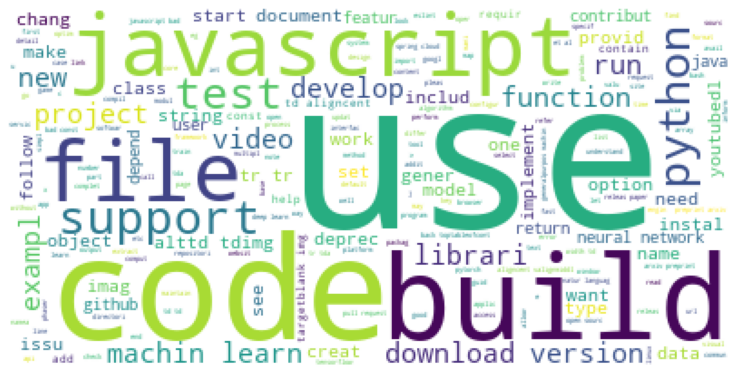

In [18]:
# join all rows together
sentence = ''.join(train.stemmed)

# Create word cloud for all languages
# create an image object, which can be displayed with plt.imshow
img = WordCloud(background_color='white').generate(sentence)

plt.axis("off")
plt.imshow(img) 

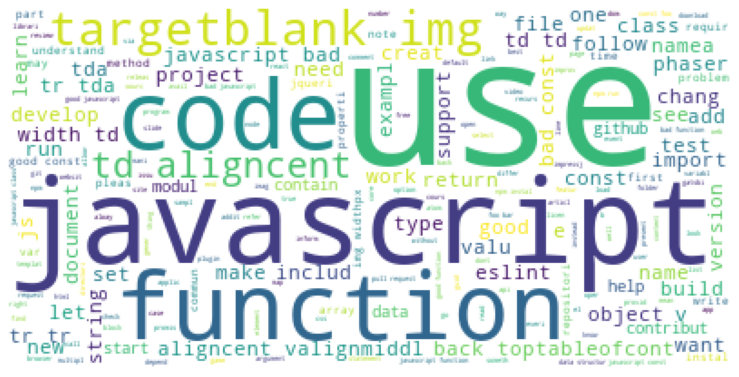

In [19]:
# join all JavaScript rows together
sentence = ''.join(train[train.language == 'JavaScript'].stemmed)

# Create word cloud for JavaScript
# create an image object, which can be displayed with plt.imshow
img = WordCloud(background_color='white').generate(sentence)

plt.axis("off")
plt.imshow(img) 

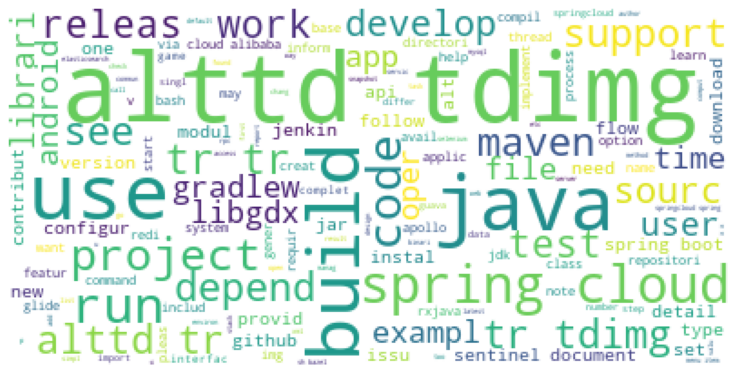

In [20]:
# join all Java rows together
sentence = ''.join(train[train.language == 'Java'].stemmed)

# Create word cloud for Java
# create an image object, which can be displayed with plt.imshow
img = WordCloud(background_color='white').generate(sentence)

plt.axis("off")
plt.imshow(img) 

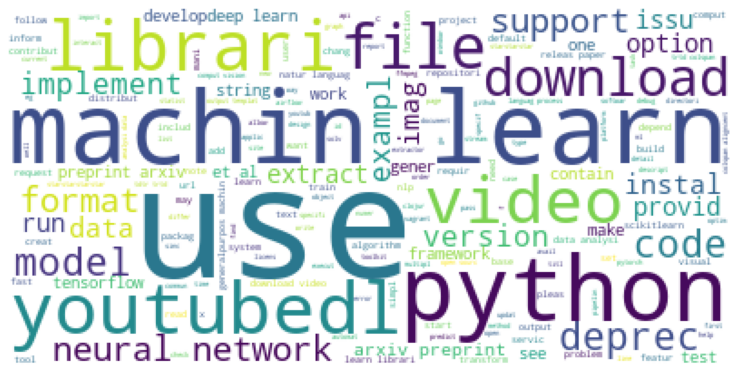

In [21]:
# join all Python rows together
sentence = ''.join(train[train.language == 'Python'].stemmed)

# Create word cloud for Python
# create an image object, which can be displayed with plt.imshow
img = WordCloud(background_color='white').generate(sentence)

plt.axis("off")
plt.imshow(img) 

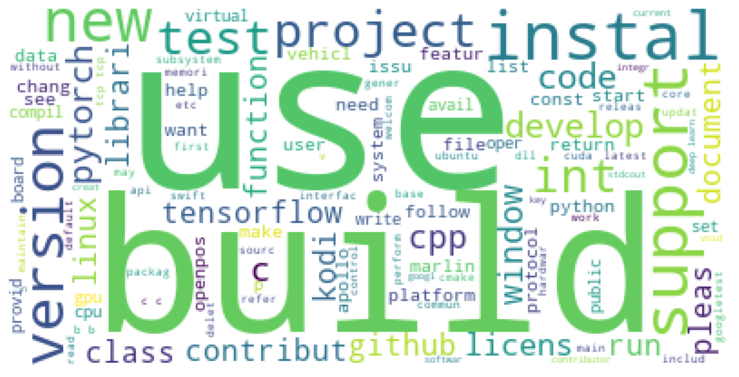

In [22]:
# join all C++ rows together
sentence = ''.join(train[train.language == 'C++'].stemmed)

# Create word cloud for C++
# create an image object, which can be displayed with plt.imshow
img = WordCloud(background_color='white').generate(sentence)

plt.axis("off")
plt.imshow(img) 

---
| Target | Definition | Data Type | Notes |
| ----- | ----- | ----- | ----- |
| `price` | Sales price of used car | float | Value being predicted |

---
| Word | Definition | 
| ----- | ----- | 
| Javascript| A programming language |
| Java | A programming language |
| Python | A programming language |
| C++ | A programming language |
| Other | Placeholder for all other programming languages not specifically named |
| Repo | A feature holding the repository url for the file on Github |
| language | A feature holding the programming language of the repo |
| readme_contents | A feature holding the text within the readme |
| clean | An engineered feature holding readme contents that were cleaned |
| stemmed | An engineered feature holding readme contents that were cleande and stemmed |
| lemmatized | An engineered feature holding readme contents that were cleaned lemmatized |

In [23]:
train.columns

Index(['repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')